In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

# read spec data
z = 0.0307
spec = '../../spectroscopy/SN2020jgb/ZTF20aayhacx_20200623_Keck1_v1.ascii'
Spec1 = SpectrumSN_Lines(spec, z)
Spec = SpectrumSN_Lines(spec, 0)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.size'] = '25'
mpl.rcParams['xtick.labelsize'] = '20'
mpl.rcParams['ytick.labelsize'] = '20'

# 20200623_Keck1

## Ca II IRT

<AxesSubplot:>

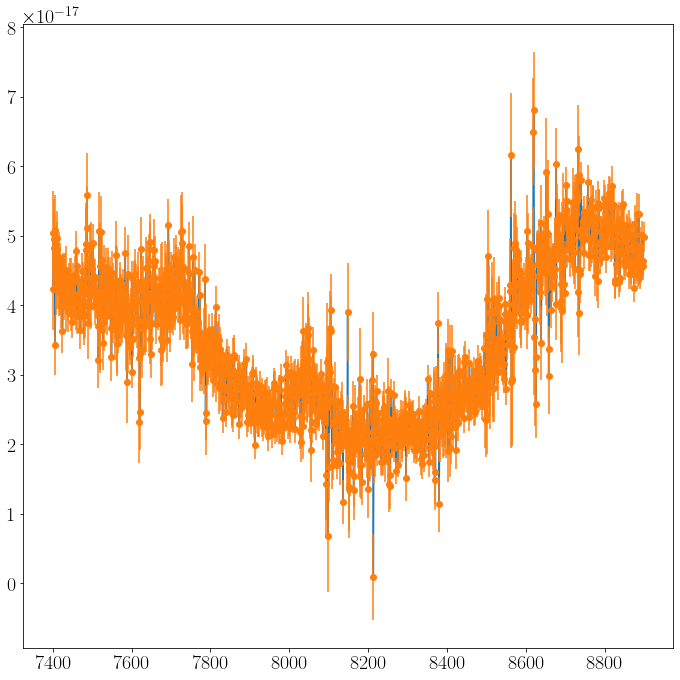

In [7]:
Spec1.plot_line_region(7400, 8900)

In [8]:
Spec1.add_line('CaII_IRT/CaII_IRT',
               7500,
               8800,
               lines=[[8498.018, 8542.089, 8662.140],
                      [8498.018, 8542.089, 8662.140]],
               rel_strength=[[], []])
Spec1.line['CaII_IRT/CaII_IRT'].LS_estimator(guess=(1, 1, -25000, 15, -1000,
                                                    -12000, 15, -1000))

LS estimation:
Velocity 1: -23898 km/s
Velocity 2: -9519 km/s


Normalize factor = 1.248


100%|███████████████████████████████████████| 1000/1000 [00:18<00:00, 53.26it/s]


MCMC results:
Velocity 1: -23845 pm 2615 km/s
Velocity 2: -9510 pm 1440 km/s
Normalize factor = 1.253


 10%|███▊                                  | 5000/50000 [01:34<14:08, 53.04it/s]

MCMC results:
Velocity 1: -23841 pm 151 km/s
Velocity 2: -9569 pm 147 km/s


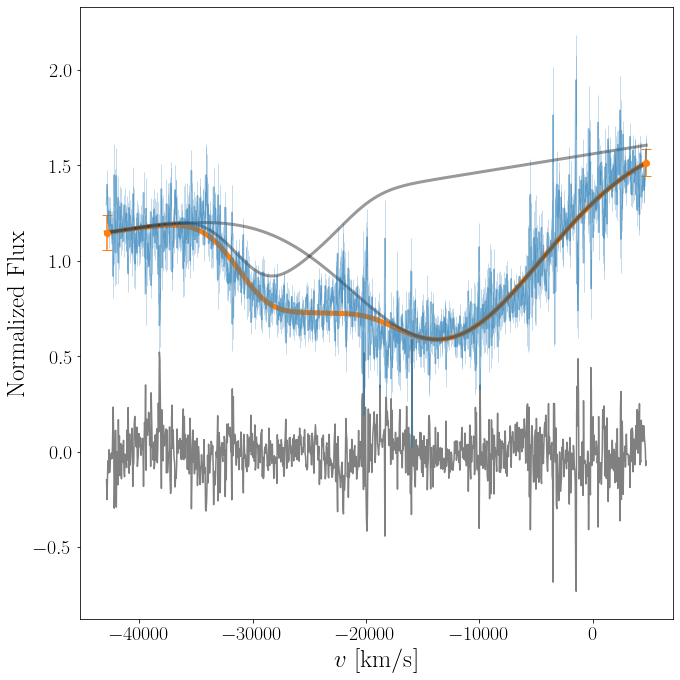

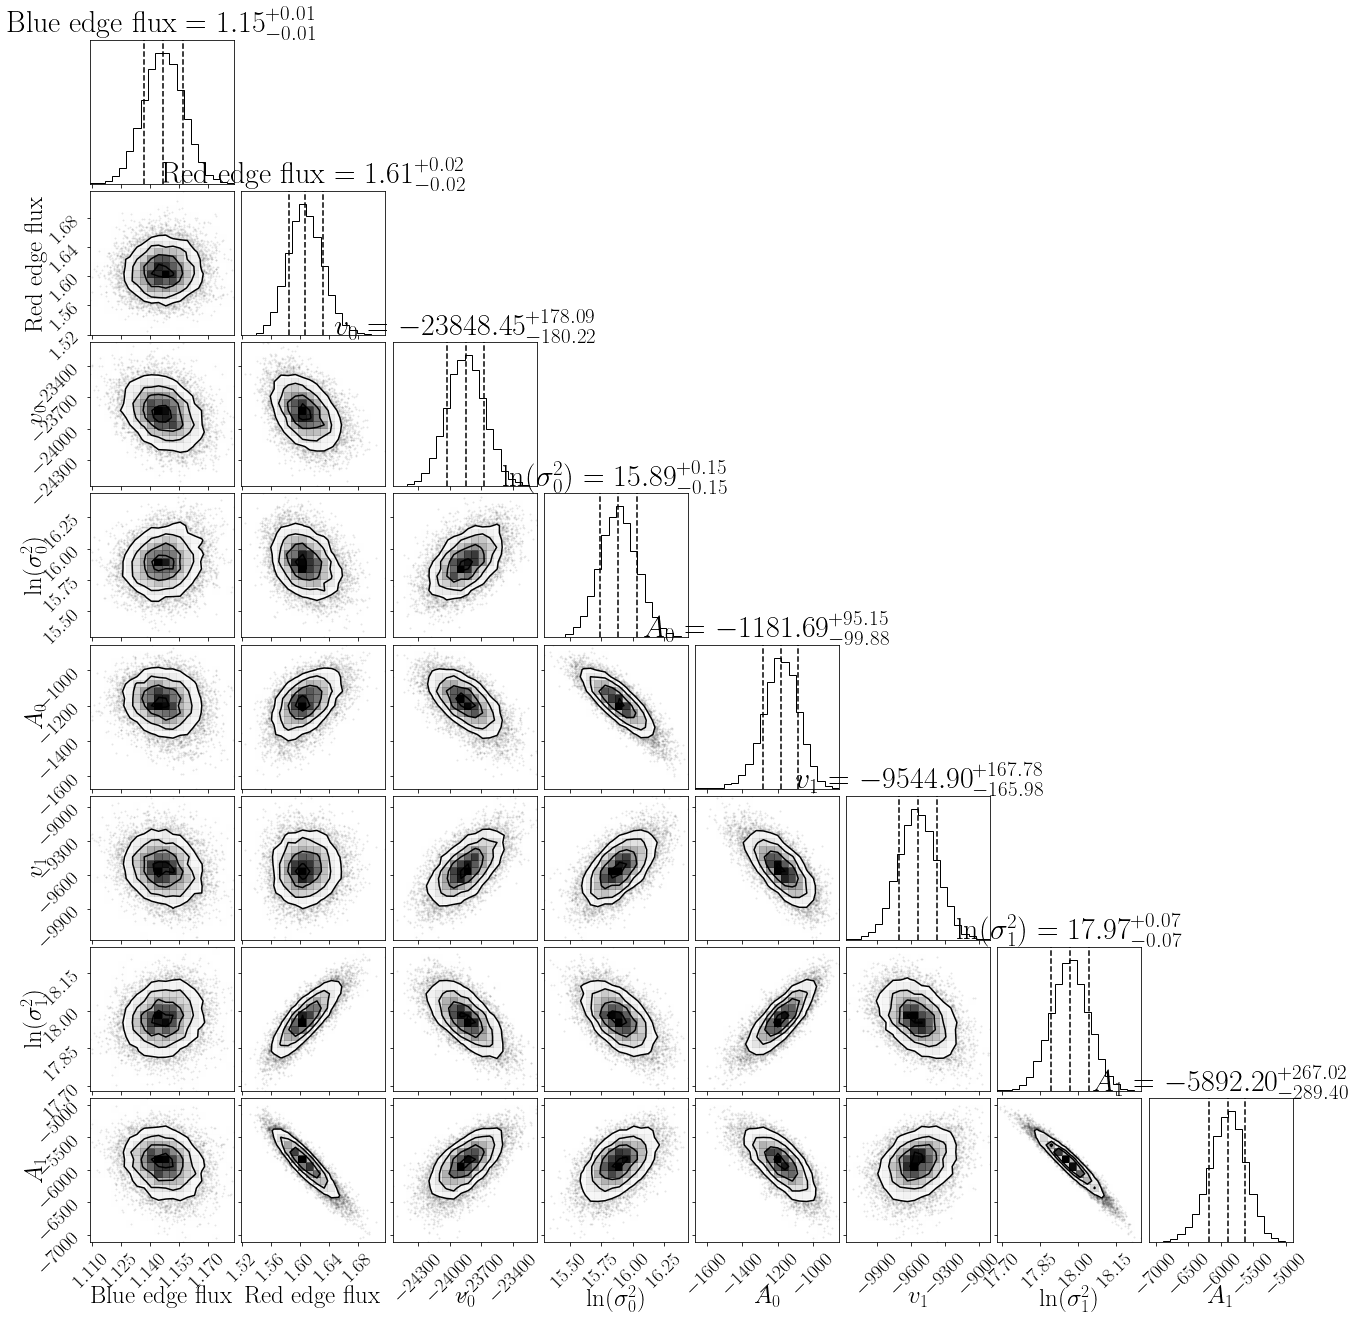

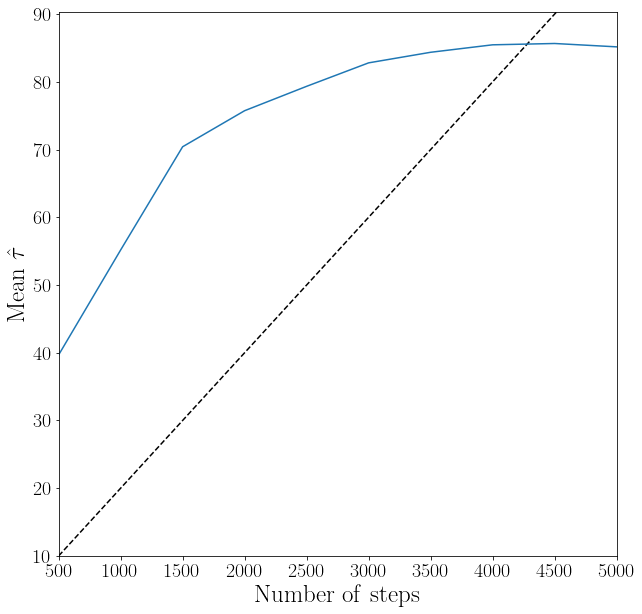

In [9]:
mu1 = -24000
mu2 = -11000
sampler = Spec1.line['CaII_IRT/CaII_IRT'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e7],
    initial=[1, 1, -25000, 15, -1000, -12000, 15, -1000],
    normalize_unc='LS',
    max_nsteps=1000,
    Plot_model=False)
sampler = Spec1.line['CaII_IRT/CaII_IRT'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e7],
    initial=Spec1.line['CaII_IRT/CaII_IRT'].theta_MCMC,
    normalize_unc='MCMC',
    Plot_mcmc=True,
    Plot_tau=True)

## Ca II IRT + Mg II 9227

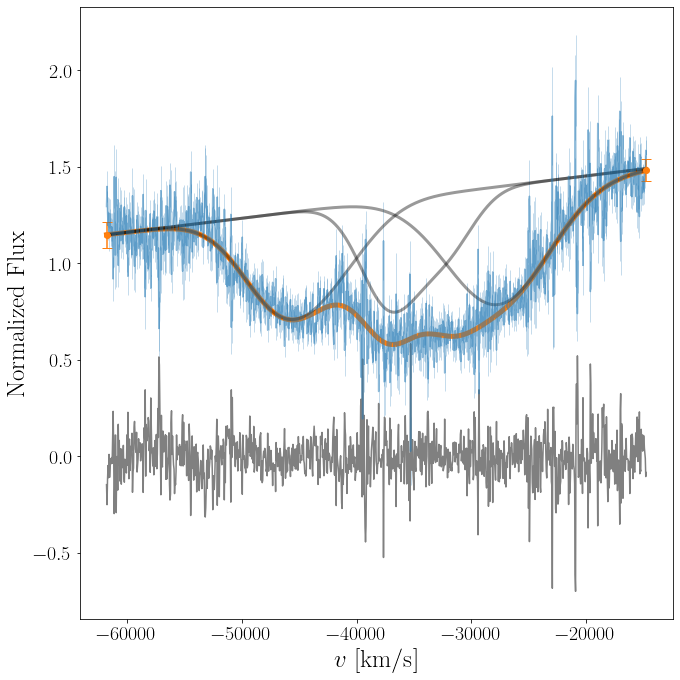

LS estimation:
Velocity 1: -27241 km/s
Velocity 2: -22446 km/s
Velocity 3: -12807 km/s


In [10]:
Spec1.add_line('MgII/CaII_IRT/CaII_IRT',
               7500,
               8800,
               lines=[
                   [9218.250, 9244.265],
                   [8498.018, 8542.089, 8662.140],
                   [8498.018, 8542.089, 8662.140],
               ],
               rel_strength=[[], [], []])
Spec1.line['MgII/CaII_IRT/CaII_IRT'].LS_estimator(
    guess=(1, 1, -28200, 15, -1000, -25000, 15, -1000, -12000, 15, -1000),
    plot_model=True)


Normalize factor = 1.195


100%|██████████| 1000/1000 [00:14<00:00, 67.04it/s]


MCMC results:
Velocity 1: -28140 pm 172 km/s
Velocity 2: -23925 pm 1607 km/s
Velocity 3: -13421 pm 721 km/s
Normalize factor = 1.313


100%|██████████| 50000/50000 [1:29:41<00:00,  9.29it/s]    


MCMC results:
Velocity 1: -28096 pm 81 km/s
Velocity 2: -22391 pm 110 km/s
Velocity 3: -13103 pm 61 km/s


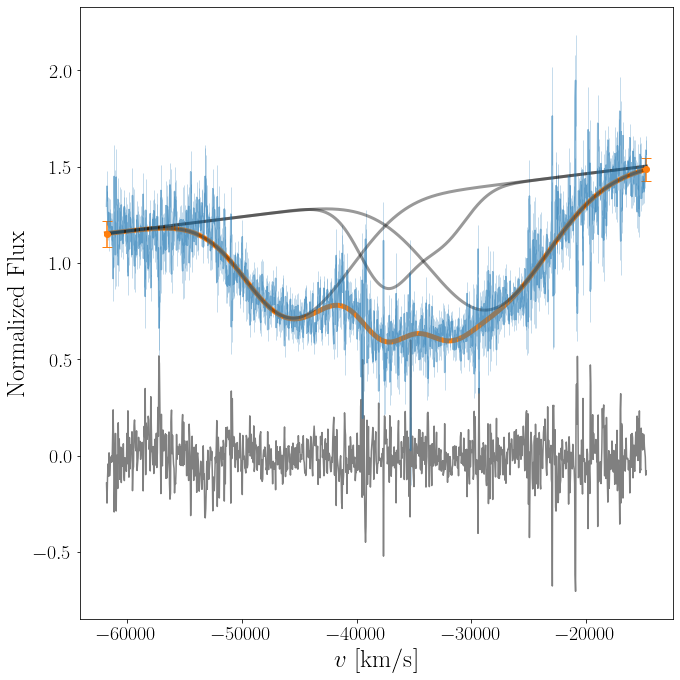

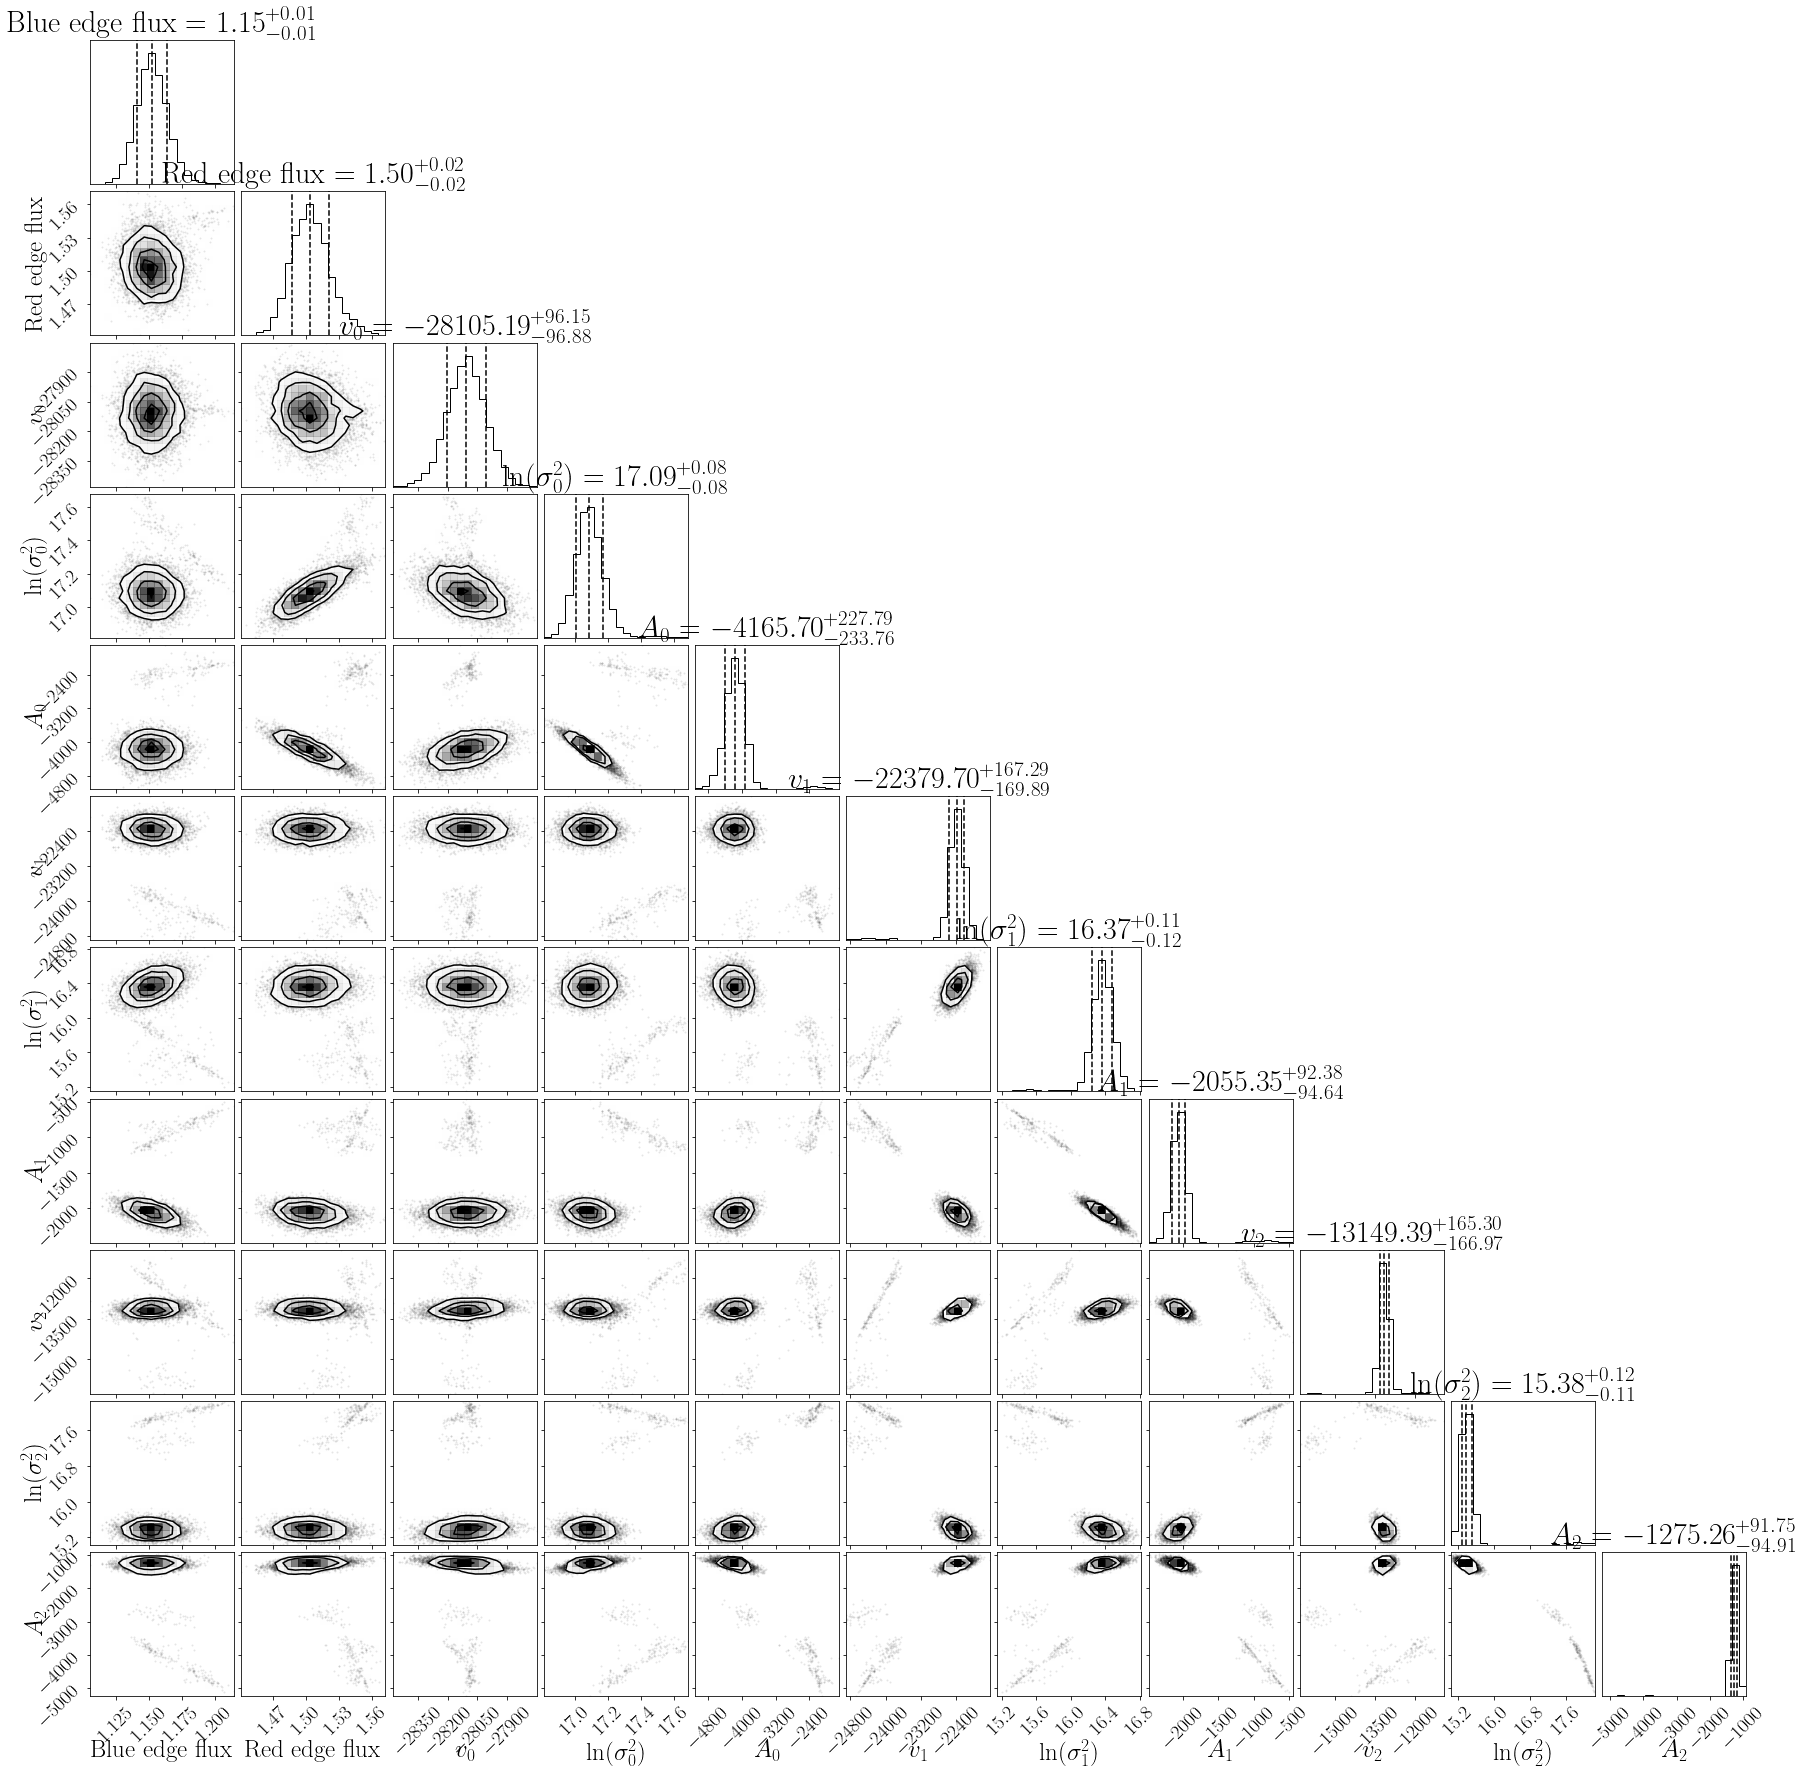

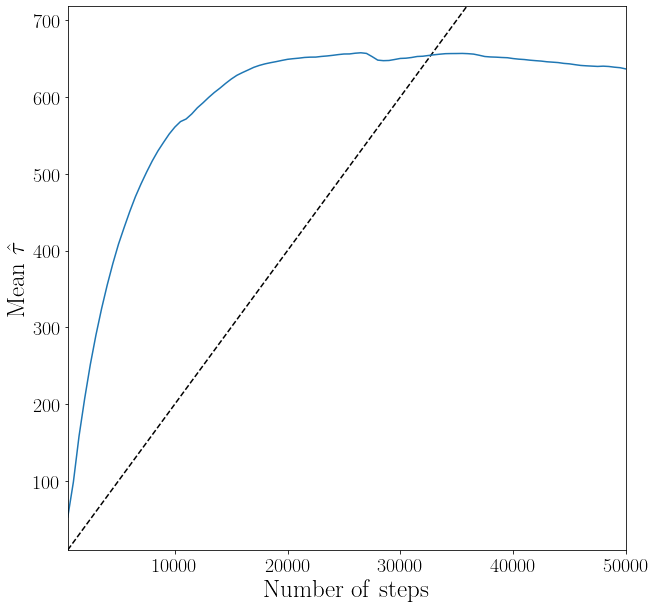

In [13]:
mu0 = -28200
mu1 = -24000
mu2 = -11000
sampler = Spec1.line['MgII/CaII_IRT/CaII_IRT'].MCMC_sampler(
    mu_prior=[mu0, mu1, mu2],
    var_prior=[1e4, 1e7, 1e7],
    initial=[1, 1, -28200, 15, -1000, -25000, 15, -1000, -12000, 15, -1000],
    normalize_unc='LS',
    max_nsteps=1000,
    Plot_model=False)
initial = Spec1.line['MgII/CaII_IRT/CaII_IRT'].theta_MCMC
initial[2] = -28200
sampler = Spec1.line['MgII/CaII_IRT/CaII_IRT'].MCMC_sampler(
    mu_prior=[mu0, mu1, mu2],
    var_prior=[1e4, 1e7, 1e7],
    initial=initial,
    normalize_unc='MCMC',
    Plot_mcmc=True,
    Plot_tau=True)

<AxesSubplot:>

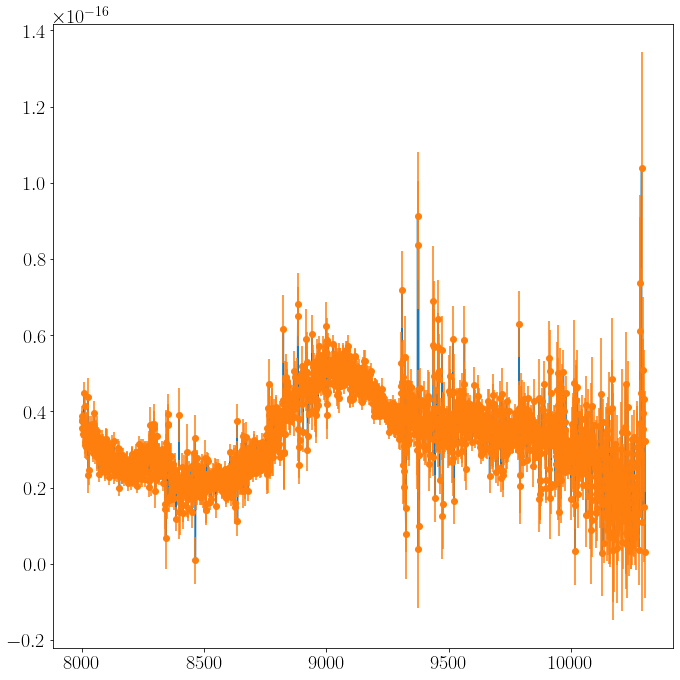

In [7]:
Spec.plot_line_region(8000, 10500)